In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

Load the CSV file and skip the header

In [2]:
data = genfromtxt('happiness_vs_time_with_loved_ones.csv', delimiter=',', skip_header=1)

Extract columns

In [3]:
X = data[:, 0]  # TimeSpentWithLovedOnes
y = data[:, 1]  # Happiness

Design matrix Φ with features in preferred order: [X, 1]

In [4]:
Φ = np.vstack([X, np.ones_like(X)]).T  # shape (n, 2)

Closed-form solution: w = (ΦᵀΦ)⁻¹Φᵀy

In [5]:
w = np.linalg.inv(Φ.T @ Φ) @ Φ.T @ y

Predictions

In [6]:
y_pred = Φ @ w

Plot data and best-fit line

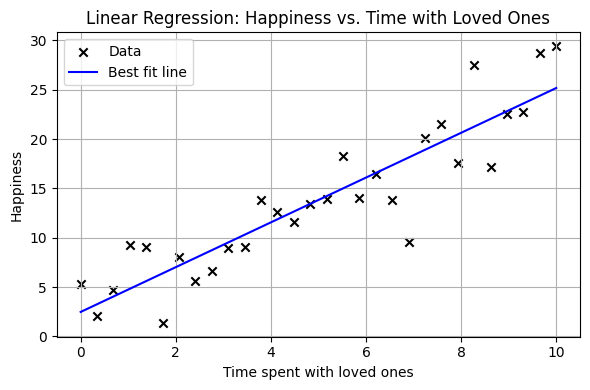

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='black', marker='x', label='Data')
plt.plot(X, y_pred, color='blue', label='Best fit line')
plt.xlabel("Time spent with loved ones")
plt.ylabel("Happiness")
plt.title("Linear Regression: Happiness vs. Time with Loved Ones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Print learned weights in the new order: [slope, intercept]

In [8]:
print(f"Slope (w₀): {w[0]:.4f}")
print(f"Intercept (w₁): {w[1]:.4f}")

Slope (w₀): 2.2682
Intercept (w₁): 2.4875
